In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import re
import time

import warnings
warnings.filterwarnings("ignore")

In [51]:
df = pd.read_csv("review_data_반객.csv")
df.head(20)

,score,review,y
0,1.0,여기는 사람이 말을해도 쌩까고 그냥 지나가버림옃번을 불러도 그냥지나가는 싸가지없는곳...,0
1,1.0,일요일 영업중이냐고 물었더니 영업중이라고 해서 3분안에 갔더니 브레이크타임이라고 안...,0
2,1.0,브레이크 타임 지난지 30초 됐나 식사도 후딱 끝내고 나가려고 준비하는데 왜 안나가...,0
3,4.0,"런치 코스 맛있었는데, <탕수육 소스>가 너무 역하고 시럽약 같아요. 제발 다른 중...",1
4,1.0,"손님들 얼굴도 안 보고 몇 명인지 묻더라고요. 짜장면은 불어터져있고, 탕수육은 바짝...",0
5,4.0,NaN,1
6,1.0,NaN,0
7,3.0,볶음 실력의 척도인 볶음밥이 그렇게 맛있지 못합니다. 하지만 딤섬류가 맛있어요. 특...,0
8,2.0,샤오롱바오 괜찮았는데 샤오마이는 냄새났어요 유린기는 맛있었고 새우볶음밥도 괜찮았아요...,0
9,2.0,조금 짠맛이 강해요! 대체적으로 요리로 나온 음식양은 적었어요 ㅜㅜ 깐풍기는 맛있었...,0


In [52]:
def text_cleaning(text):
    # 정규표현식으로 한글만 추출
        hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
        result = hangul.sub('', text)
        return result

In [53]:
df = pd.read_csv("review_data_반객.csv")
row = []
for i in df['review']:
    row.append(text_cleaning(str(i)))

df['ko_text'] = row
del df['review']

# 한 글자 이상의 텍스트를 가지고 있는 데이터만 추출
df = df[df['ko_text'].str.len() > 0]
df.tail(5)

,score,y,ko_text
14,1.0,0,카카오맵 리뷰를 믿었어야하는데갔다 돈 아까움음식 맛도 맛 그냥그런데 서빙도 형편없음...
15,1.0,0,맛이아닌 인테리어에 신경을 많이 썼나보네요
19,1.0,0,실력이 아닌 인테리어에 신경 쓰는 듯
20,3.0,0,먹을만해요사무실 팀장님 생일인데 저녁에는 회식하기 싫을때 점심에 룸 잡아서 코스 ...
21,1.0,0,진짜 대 실망입니다 아이들에게 맛있는 중국집 소개해 주겠다고 갔다가 내상만 크게 입...


In [54]:
from konlpy.tag import Okt

# konlpy라이브러리로 텍스트 데이터에서 형태소를 추출합니다.
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}/{}'.format(word,tag) for word, tag in pos]
    return pos

# 형태소 추출 동작을 테스트합니다.
result = get_pos(df['ko_text'].values[0])
print(result)

['여기는/Verb', '사람/Noun', '이/Josa', '말/Noun', '을해/Noun', '도/Josa', '쌩까고/Verb', '그냥/Noun', '지나/Noun', '가버림/Verb', '옃번/Noun', '을/Josa', '불러도/Verb', '그냥/Noun', '지나가는/Verb', '싸가지/Noun', '없는/Adjective', '곳임/Noun', '절대/Noun', '가지맙시/Noun', '다/Josa']


In [55]:
from sklearn.feature_extraction.text import CountVectorizer

# 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].tolist())

In [56]:
X.shape

(17, 345)

In [57]:
print(str(index_vectorizer.vocabulary_)[:100]+"..")

{'여기는/Verb': 212, '사람/Noun': 153, '이/Josa': 238, '말/Noun': 97, '을해/Noun': 232, '도/Josa': 76, '쌩까고/Ve..


In [58]:
print(df['ko_text'].values[1])
print(X[1])

일요일 영업중이냐고 물었더니 영업중이라고 해서 분안에 갔더니 브레이크타임이라고 안된다는게 상식적으로 납득이 안가는 짜증나는 명소 영업중인데 지금은 브레이크타임이라고 말해주는 센스가 필요
  (0, 238)	1
  (0, 97)	1
  (0, 249)	1
  (0, 214)	3
  (0, 277)	3
  (0, 239)	1
  (0, 21)	1
  (0, 123)	1
  (0, 242)	3
  (0, 332)	1
  (0, 142)	1
  (0, 208)	1
  (0, 12)	1
  (0, 149)	2
  (0, 310)	2
  (0, 194)	1
  (0, 157)	1
  (0, 261)	1
  (0, 229)	1
  (0, 53)	1
  (0, 193)	1
  (0, 5)	1
  (0, 293)	1
  (0, 113)	1
  (0, 246)	1
  (0, 281)	1
  (0, 230)	1
  (0, 333)	1
  (0, 166)	1
  (0, 2)	1
  (0, 319)	1


In [59]:
print(df['ko_text'].values[0])
print(X[0])

여기는 사람이 말을해도 쌩까고 그냥 지나가버림옃번을 불러도 그냥지나가는 싸가지없는곳임절대 가지맙시다
  (0, 212)	1
  (0, 153)	1
  (0, 238)	1
  (0, 97)	1
  (0, 232)	1
  (0, 76)	1
  (0, 182)	1
  (0, 33)	2
  (0, 282)	1
  (0, 7)	1
  (0, 215)	1
  (0, 231)	1
  (0, 145)	1
  (0, 283)	1
  (0, 180)	1
  (0, 201)	1
  (0, 23)	1
  (0, 265)	1
  (0, 8)	1
  (0, 65)	1


In [60]:
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF 방법으로, 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

print(X.shape)
print(X[0])

(17, 345)
  (0, 283)	0.22084518127513017
  (0, 282)	0.22084518127513017
  (0, 265)	0.1928380728800444
  (0, 238)	0.09708113680103786
  (0, 232)	0.22084518127513017
  (0, 231)	0.1729667132356269
  (0, 215)	0.22084518127513017
  (0, 212)	0.22084518127513017
  (0, 201)	0.22084518127513017
  (0, 182)	0.22084518127513017
  (0, 180)	0.22084518127513017
  (0, 153)	0.22084518127513017
  (0, 145)	0.22084518127513017
  (0, 97)	0.1729667132356269
  (0, 76)	0.12508824519612366
  (0, 65)	0.22084518127513017
  (0, 33)	0.44169036255026034
  (0, 23)	0.22084518127513017
  (0, 8)	0.22084518127513017
  (0, 7)	0.22084518127513017


In [61]:
from sklearn.model_selection import train_test_split

y = df['y']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)

(13, 345)
(4, 345)


In [62]:
import pickle
with open('맛집리뷰분석_충남대.model', 'rb') as f:
  loaded_model = pickle.load(f)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test,y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

accuracy: 1.00
Precision: 0.000
Recall: 0.000
F1: 0.000


In [64]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC: %.3f" % roc_auc)

plt.rcParams['figure.figsize']=[5,4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

[(0.337705454980575, 308), (0.27359920728186726, 105), (0.27359920728186726, 20), (0.2103665023401429, 139), (0.2103665023401429, 117)]
[(-0.14995482006265712, 47), (-0.15771528596264678, 99), (-0.16239344767236324, 97), (-0.16696154351574935, 63), (-0.1820243805198527, 231)]


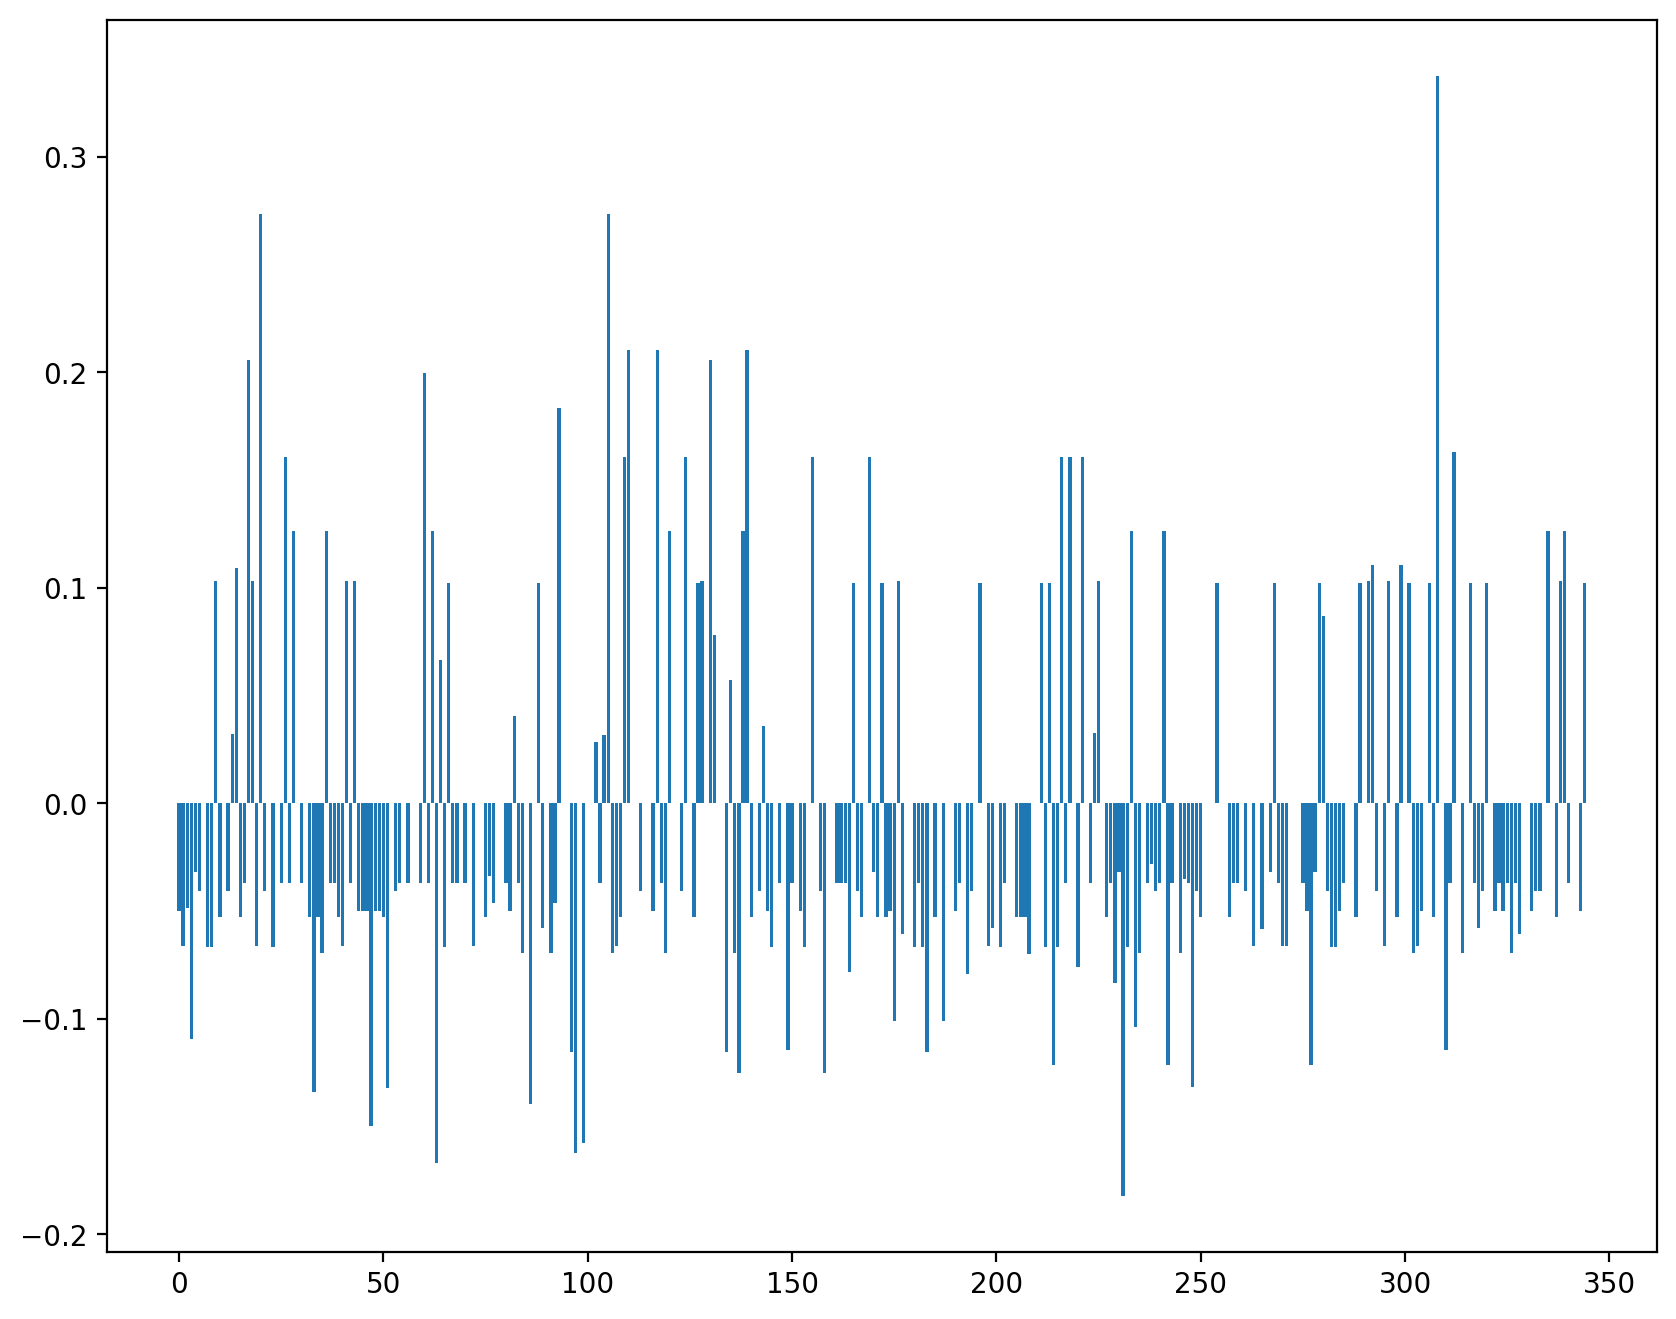

In [65]:
plt.rcParams['figure.figsize'] = [10,8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])
print(sorted(((value, index)for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value, index)for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])

In [66]:
# 회귀모델의 계수를 기준으로 내림차순 정렬
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)

In [67]:
# 회귀 모델의 계수를 index_vectorizer에 맵핑하여, 어떤 형태소인지 출력
invert_index_vectorizer = {v:k for k, v in index_vectorizer.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'..')

{212: '여기는/Verb', 153: '사람/Noun', 238: '이/Josa', 97: '말/Noun', 232: '을해/Noun', 76: '도/Josa', 182: '쌩..


In [68]:
# 계수가 높은 순으로 피처에 형태소 맵핑한 결과 출력, 이때 계수가 높은 피쳐는 리뷰에 긍정적인 영향을 주는 형태소라고 할 수 있다.
for coef in coef_pos_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])

코스/Noun 0.337705454980575
맛있었어요/Adjective 0.27359920728186726
고/Josa 0.27359920728186726
부모님/Noun 0.2103665023401429
모시/Noun 0.2103665023401429
먹었는데/Verb 0.2103665023401429
반/Modifier 0.20593854027424477
객/Noun 0.20593854027424477
너무/Adverb 0.19968270468332053
리뷰/Noun 0.18350713485076695


In [69]:
# 하위 10개 부정 형태소 출력
for coef in coef_pos_index[-10:]:
    print(invert_index_vectorizer[coef[1]], coef[0])

볶음밥/Noun -0.12507664841328514
인테리어/Noun -0.1318121965608567
나온/Verb -0.13216312420248613
그냥/Noun -0.13379962814732907
딤섬/Noun -0.139388488309798
나가라고/Verb -0.14995482006265712
맛/Noun -0.15771528596264678
말/Noun -0.16239344767236324
는/Josa -0.16696154351574935
을/Josa -0.1820243805198527


In [70]:
#긍정
pos_key = []
pos_value = []
for coef in coef_pos_index[:50]:   #20단어 뽑기
    pos_key.append(invert_index_vectorizer[coef[1]])
    pos_value.append(coef[0])
pos_wc = dict(zip(pos_key, pos_value))  #딕셔너리로 변환
pos_wc

{'코스/Noun': 0.337705454980575,
 '맛있었어요/Adjective': 0.27359920728186726,
 '고/Josa': 0.27359920728186726,
 '부모님/Noun': 0.2103665023401429,
 '모시/Noun': 0.2103665023401429,
 '먹었는데/Verb': 0.2103665023401429,
 '반/Modifier': 0.20593854027424477,
 '객/Noun': 0.20593854027424477,
 '너무/Adverb': 0.19968270468332053,
 '리뷰/Noun': 0.18350713485076695,
 '탕수육/Noun': 0.16314551611121833,
 '소스/Noun': 0.16077084226670432,
 '왜캐/Noun': 0.16069696512199114,
 '왔는데/Verb': 0.16069696512199114,
 '오늘/Noun': 0.16069696512199114,
 '살벌하죠/Adjective': 0.16069696512199114,
 '뭐/Noun': 0.16069696512199114,
 '먹고/Verb': 0.16069696512199114,
 '괜찮았습니다/Adjective': 0.16069696512199114,
 '혹평/Noun': 0.12637977008889625,
 '했었는데/Verb': 0.12637977008889625,
 '이라/Josa': 0.12637977008889625,
 '음/Noun': 0.12637977008889625,
 '봄/Noun': 0.12637977008889625,
 '무섭지만/Adjective': 0.12637977008889625,
 '년도/Noun': 0.12637977008889625,
 '글쓰기/Noun': 0.12637977008889625,
 '괜찮았어요/Adjective': 0.12637977008889625,
 '찹쌀/Noun': 0.1103525608947044,
 '

In [71]:
#부정
neg_key = []
neg_value = []
for coef in coef_pos_index[-50:]:   #20단어 뽑기
    neg_key.append(invert_index_vectorizer[coef[1]])
    neg_value.append(coef[0])
for v in range(len(neg_value)):     #절댓값 처리(음수를 양수로)
    neg_value[v] = abs(neg_value[v])
neg_wc = dict(zip(neg_key, neg_value))  #딕셔너리로 변환
neg_wc

{'옃번/Noun': 0.06689981407366453,
 '여기는/Verb': 0.06689981407366453,
 '없는/Adjective': 0.06689981407366453,
 '쌩까고/Verb': 0.06689981407366453,
 '싸가지/Noun': 0.06689981407366453,
 '사람/Noun': 0.06689981407366453,
 '불러도/Verb': 0.06689981407366453,
 '다/Josa': 0.06689981407366453,
 '곳임/Noun': 0.06689981407366453,
 '가지맙시/Noun': 0.06689981407366453,
 '가버림/Verb': 0.06689981407366453,
 '하지만/Conjunction': 0.069694244154899,
 '특히/Adverb': 0.069694244154899,
 '척도/Noun': 0.069694244154899,
 '인/Josa': 0.069694244154899,
 '의/Josa': 0.069694244154899,
 '볶음/Noun': 0.069694244154899,
 '못/VerbPrefix': 0.069694244154899,
 '맛있지/Adjective': 0.069694244154899,
 '류/Noun': 0.069694244154899,
 '들어간/Verb': 0.069694244154899,
 '그렇게/Adverb': 0.069694244154899,
 '에/Josa': 0.07015535344551398,
 '왜/Noun': 0.07575639680830148,
 '서빙/Noun': 0.07819128751960523,
 '안/VerbPrefix': 0.07898841058655508,
 '으로/Josa': 0.08345583252043791,
 '아닌/Adjective': 0.10087465209702681,
 '신경/Noun': 0.10087465209702681,
 '음식/Noun': 0.1037820899

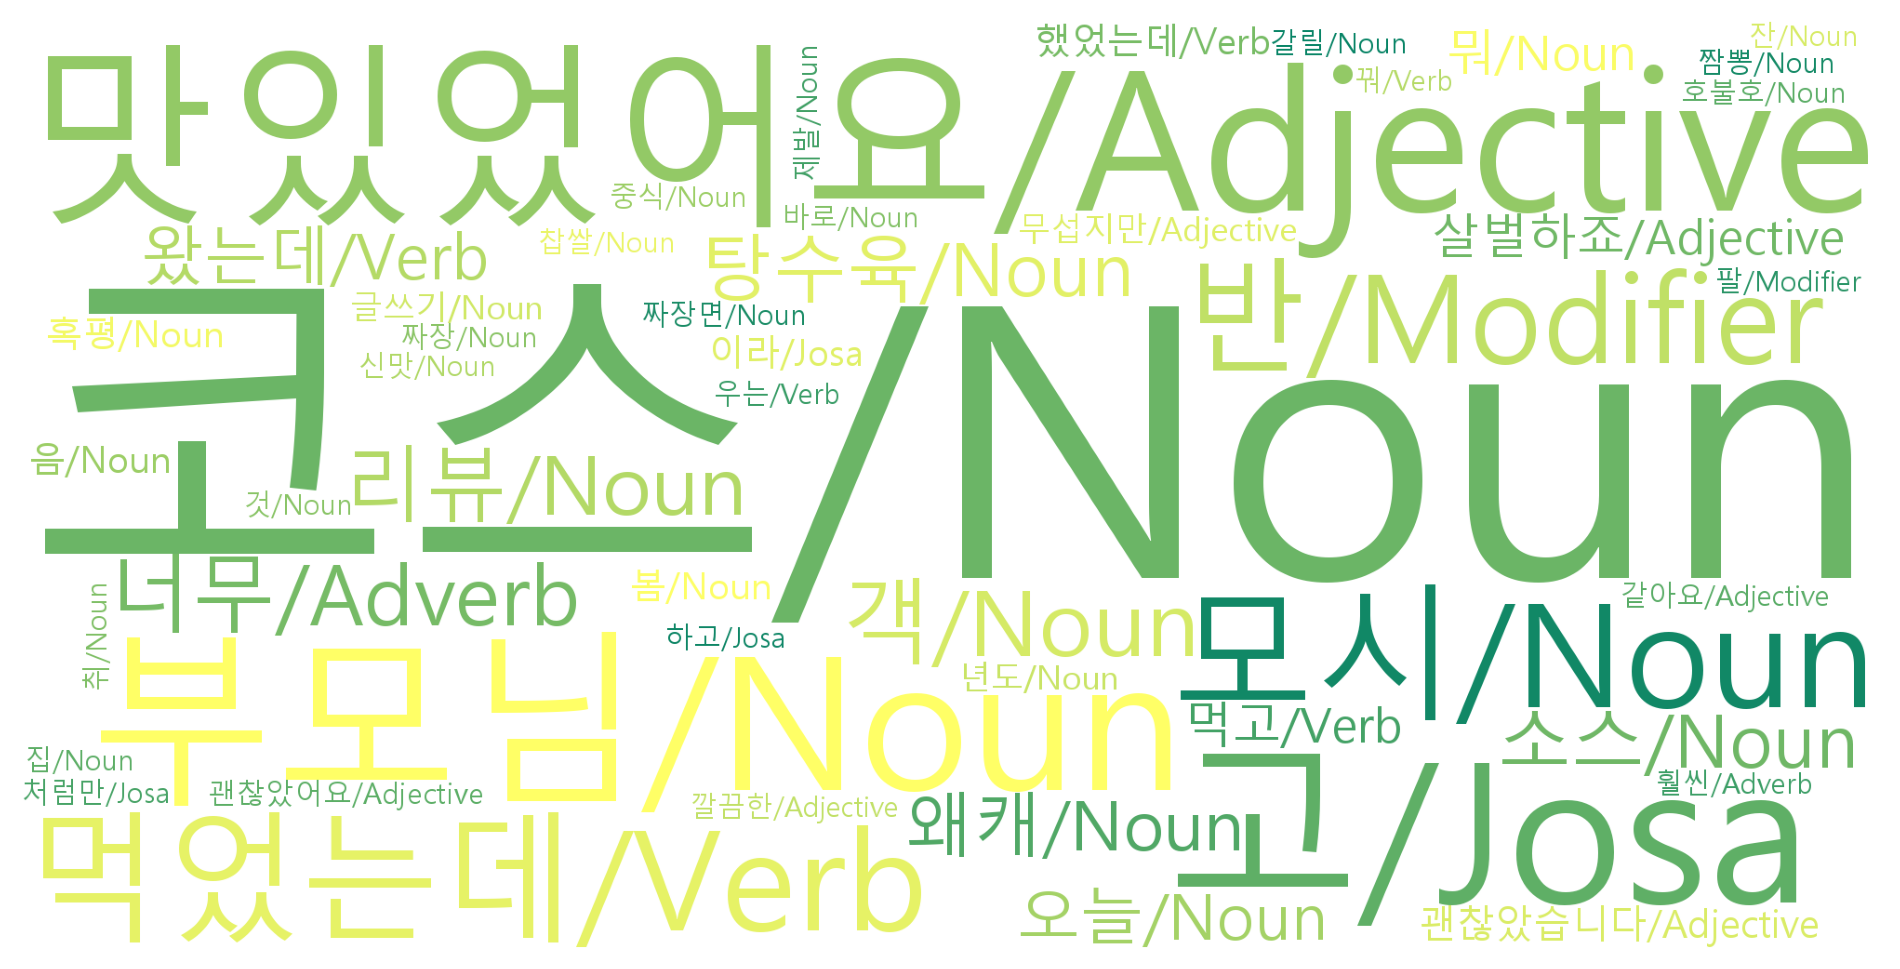

In [72]:
from wordcloud import WordCloud
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
wordcloud = WordCloud(font_path= "c:/Windows/fonts/malgun.ttf", 
                      relative_scaling = 0.2,
                      max_font_size = 600, 
                      background_color='white',
                      colormap = 'summer',
                      width=2000, height=1000).generate_from_frequencies(pos_wc)

plt.figure(figsize = (12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

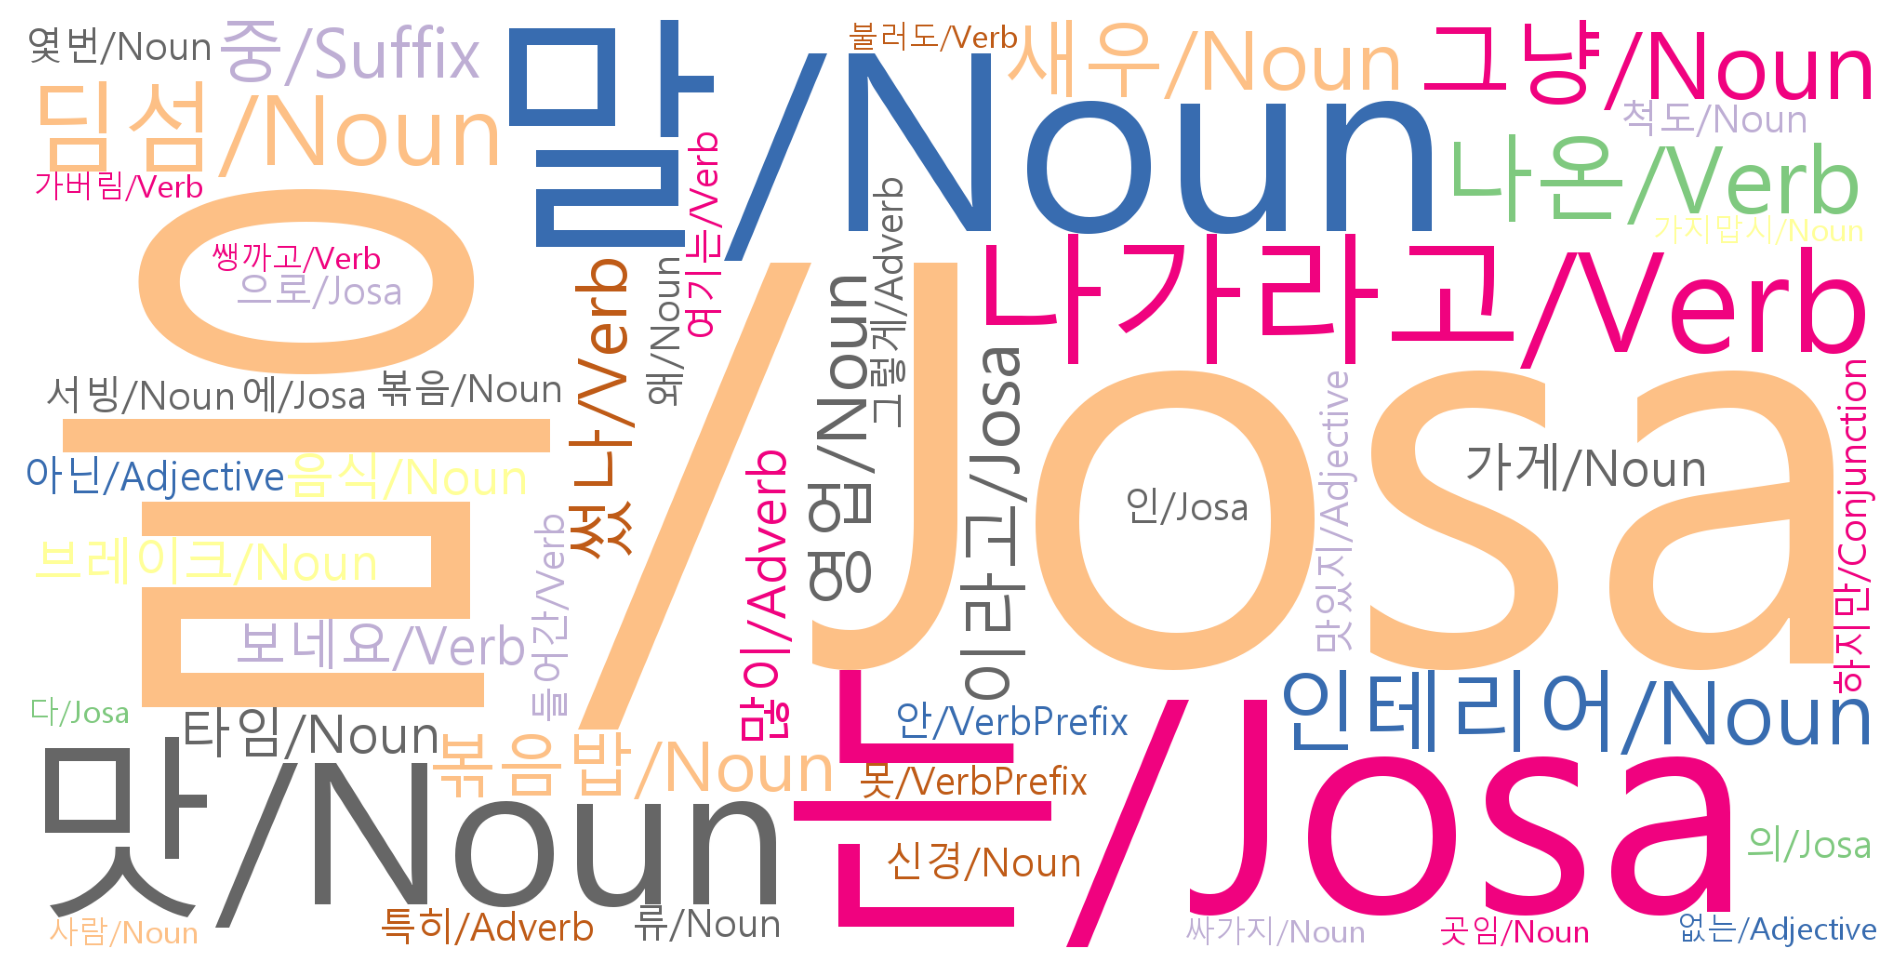

In [73]:
wordcloud = WordCloud(font_path = 'c:/Windows/fonts/malgun.ttf', 
                      relative_scaling = 0.2,
                      max_font_size = 600,
                      background_color='white',
                      colormap = "Accent_r", 
                      width=2000, height=1000).generate_from_frequencies(neg_wc) 

plt.figure(figsize = (12,8))                
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [74]:
# 보기좋은 워드클라우드 가시화를 위한 코드

In [75]:
df['y'].value_counts()

y
0    12
1     5
Name: count, dtype: int64

In [76]:
from konlpy.tag import Okt

# konlpy라이브러리로 텍스트 데이터에서 형태소를 추출합니다.
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    pos = ['{}'.format(word[0]) for word in pos]
    return pos

# 형태소 추출 동작을 테스트합니다.
result = get_pos(df['ko_text'].values[0])
print(result)

['여기는', '사람', '이', '말', '을해', '도', '쌩까고', '그냥', '지나', '가버림', '옃번', '을', '불러도', '그냥', '지나가는', '싸가지', '없는', '곳임', '절대', '가지맙시', '다']


In [77]:
from sklearn.feature_extraction.text import CountVectorizer

# 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_pos(x))
X = index_vectorizer.fit_transform(df['ko_text'].tolist())

In [78]:
X.shape

(17, 337)

In [79]:
print(str(index_vectorizer.vocabulary_)[:100]+"..")

{'여기는': 206, '사람': 148, '이': 231, '말': 93, '을해': 225, '도': 72, '쌩까고': 177, '그냥': 31, '지나': 275, '가버림..


In [80]:
print(df['ko_text'].values[0])
print(X[0])

여기는 사람이 말을해도 쌩까고 그냥 지나가버림옃번을 불러도 그냥지나가는 싸가지없는곳임절대 가지맙시다
  (0, 206)	1
  (0, 148)	1
  (0, 231)	1
  (0, 93)	1
  (0, 225)	1
  (0, 72)	1
  (0, 177)	1
  (0, 31)	2
  (0, 275)	1
  (0, 7)	1
  (0, 209)	1
  (0, 224)	1
  (0, 140)	1
  (0, 276)	1
  (0, 175)	1
  (0, 195)	1
  (0, 22)	1
  (0, 258)	1
  (0, 8)	1
  (0, 62)	1


In [81]:
from sklearn.feature_extraction.text import TfidfTransformer

# TF-IDF 방법으로, 형태소를 벡터 형태의 학습 데이터셋(X 데이터)으로 변환합니다.
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

print(X.shape)
print(X[0])

(17, 337)
  (0, 276)	0.2284170065542119
  (0, 275)	0.2284170065542119
  (0, 258)	0.19944965564844302
  (0, 231)	0.10040962874053969
  (0, 225)	0.2284170065542119
  (0, 224)	0.17889699310026022
  (0, 209)	0.2284170065542119
  (0, 206)	0.2284170065542119
  (0, 195)	0.2284170065542119
  (0, 177)	0.2284170065542119
  (0, 175)	0.2284170065542119
  (0, 148)	0.2284170065542119
  (0, 140)	0.2284170065542119
  (0, 93)	0.17889699310026022
  (0, 72)	0.12937697964630854
  (0, 62)	0.17889699310026022
  (0, 31)	0.39889931129688605
  (0, 22)	0.2284170065542119
  (0, 8)	0.2284170065542119
  (0, 7)	0.2284170065542119


In [82]:
from sklearn.model_selection import train_test_split

y = df['y']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)

(11, 337)
(6, 337)


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test,y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

accuracy: 0.83
Precision: 0.000
Recall: 0.000
F1: 0.000


In [84]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)

In [85]:
invert_index_vectorizer = {v:k for k, v in index_vectorizer.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'..')

{206: '여기는', 148: '사람', 231: '이', 93: '말', 225: '을해', 72: '도', 177: '쌩까고', 31: '그냥', 275: '지나', 7: '..


In [86]:
for coef in coef_pos_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])

코스 0.31197804893739844
맛있었어요 0.2858126851906945
고 0.25636058284628926
부모님 0.22129029317824503
모시 0.22129029317824503
먹었는데 0.22129029317824503
반 0.21206559765650732
객 0.21206559765650732
왜캐 0.16651058059700416
왔는데 0.16651058059700416


In [87]:
for coef in coef_pos_index[-10:]:
    print(invert_index_vectorizer[coef[1]], coef[0])

나가라고 -0.14541454913658333
에 -0.14732219345179232
도 -0.14753926508626145
그냥 -0.1562905594620655
실력 -0.16328836232175364
을 -0.16905823513741336
맛 -0.1829287617328139
아닌 -0.19400690642447244
신경 -0.19400690642447244
인테리어 -0.21239722884011908


In [88]:
#긍정
pos_key = []
pos_value = []
for coef in coef_pos_index[:50]:   #50단어 뽑기
    pos_key.append(invert_index_vectorizer[coef[1]])
    pos_value.append(coef[0])
pos_wc = dict(zip(pos_key, pos_value))  #딕셔너리로 변환
pos_wc

{'코스': 0.31197804893739844,
 '맛있었어요': 0.2858126851906945,
 '고': 0.25636058284628926,
 '부모님': 0.22129029317824503,
 '모시': 0.22129029317824503,
 '먹었는데': 0.22129029317824503,
 '반': 0.21206559765650732,
 '객': 0.21206559765650732,
 '왜캐': 0.16651058059700416,
 '왔는데': 0.16651058059700416,
 '오늘': 0.16651058059700416,
 '살벌하죠': 0.16651058059700416,
 '뭐': 0.16651058059700416,
 '먹고': 0.16651058059700416,
 '괜찮았습니다': 0.16651058059700416,
 '소스': 0.1656839253431174,
 '같아요': 0.1656839253431174,
 '호불호': 0.10603279882825366,
 '짬뽕': 0.10603279882825366,
 '짜장': 0.10603279882825366,
 '우는': 0.10603279882825366,
 '신맛': 0.10603279882825366,
 '바로': 0.10603279882825366,
 '꿔': 0.10603279882825366,
 '깔끔한': 0.10603279882825366,
 '것': 0.10603279882825366,
 '갈릴': 0.10603279882825366,
 '훨씬': 0.10551366489468163,
 '하고': 0.10551366489468163,
 '팔': 0.10551366489468163,
 '취': 0.10551366489468163,
 '처럼만': 0.10551366489468163,
 '집': 0.10551366489468163,
 '중식': 0.10551366489468163,
 '제발': 0.10551366489468163,
 '잔': 0.1055136

In [89]:
#부정
neg_key = []
neg_value = []
for coef in coef_pos_index[-50:]:   #50단어 뽑기
    neg_key.append(invert_index_vectorizer[coef[1]])
    neg_value.append(coef[0])
for v in range(len(neg_value)):     #절댓값 처리(음수를 양수로)
    neg_value[v] = abs(neg_value[v])
neg_wc = dict(zip(neg_key, neg_value))  #딕셔너리로 변환
neg_wc

{'절대': 0.05674944232717732,
 '합니다': 0.058688117592102663,
 '새우': 0.058688117592102663,
 '볶음밥': 0.058688117592102663,
 '못': 0.058688117592102663,
 '이': 0.06279117422136758,
 '지나가는': 0.06499152729971597,
 '지나': 0.06499152729971597,
 '을해': 0.06499152729971597,
 '옃번': 0.06499152729971597,
 '여기는': 0.06499152729971597,
 '없는': 0.06499152729971597,
 '쌩까고': 0.06499152729971597,
 '싸가지': 0.06499152729971597,
 '사람': 0.06499152729971597,
 '불러도': 0.06499152729971597,
 '곳임': 0.06499152729971597,
 '가지맙시': 0.06499152729971597,
 '가버림': 0.06499152729971597,
 '하지만': 0.06721176879000705,
 '특히': 0.06721176879000705,
 '척도': 0.06721176879000705,
 '인': 0.06721176879000705,
 '의': 0.06721176879000705,
 '볶음': 0.06721176879000705,
 '맛있지': 0.06721176879000705,
 '류': 0.06721176879000705,
 '들어간': 0.06721176879000705,
 '그렇게': 0.06721176879000705,
 '가게': 0.07634518672506252,
 '다': 0.08886465000268448,
 '썼나': 0.10239176379593644,
 '보네요': 0.10239176379593644,
 '많이': 0.10239176379593644,
 '듯': 0.10460024472965096,
 '생일': 

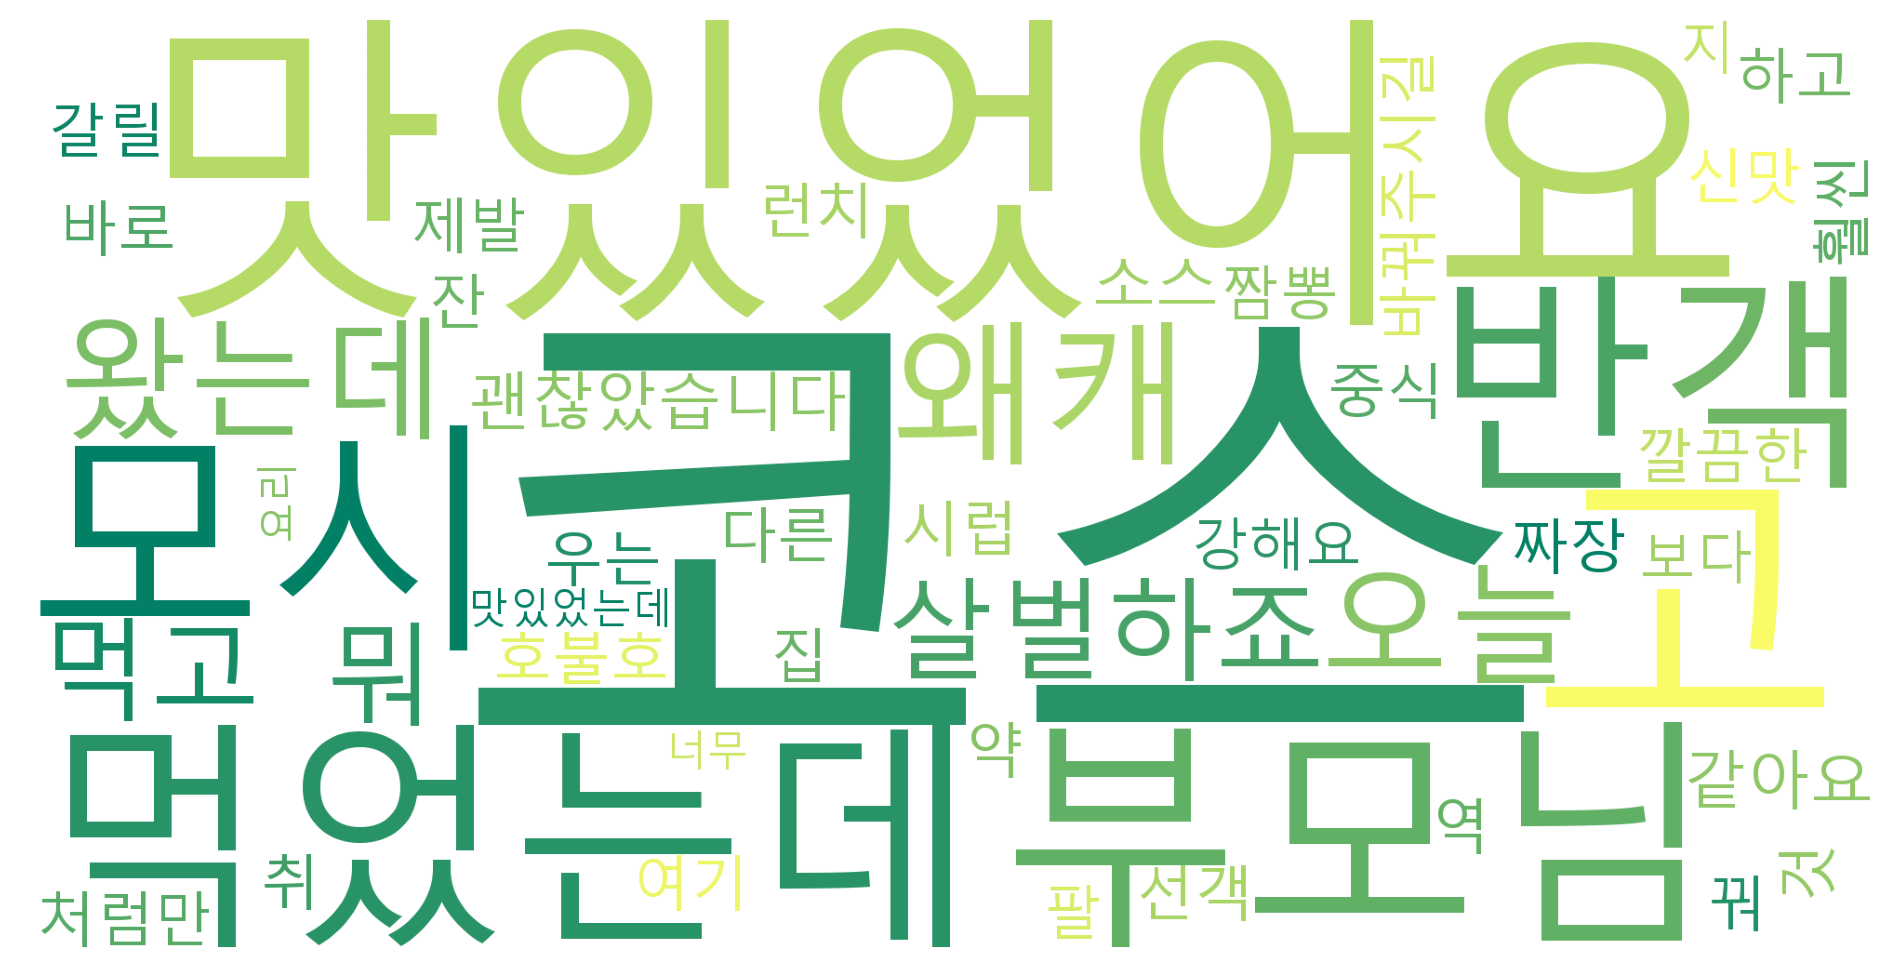

In [90]:
from wordcloud import WordCloud
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
wordcloud = WordCloud(font_path= "c:/Windows/fonts/malgun.ttf", 
                      relative_scaling = 0.2,
                      max_font_size = 600, 
                      background_color='white',
                      colormap = 'summer',
                      width=2000, height=1000).generate_from_frequencies(pos_wc)

plt.figure(figsize = (12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

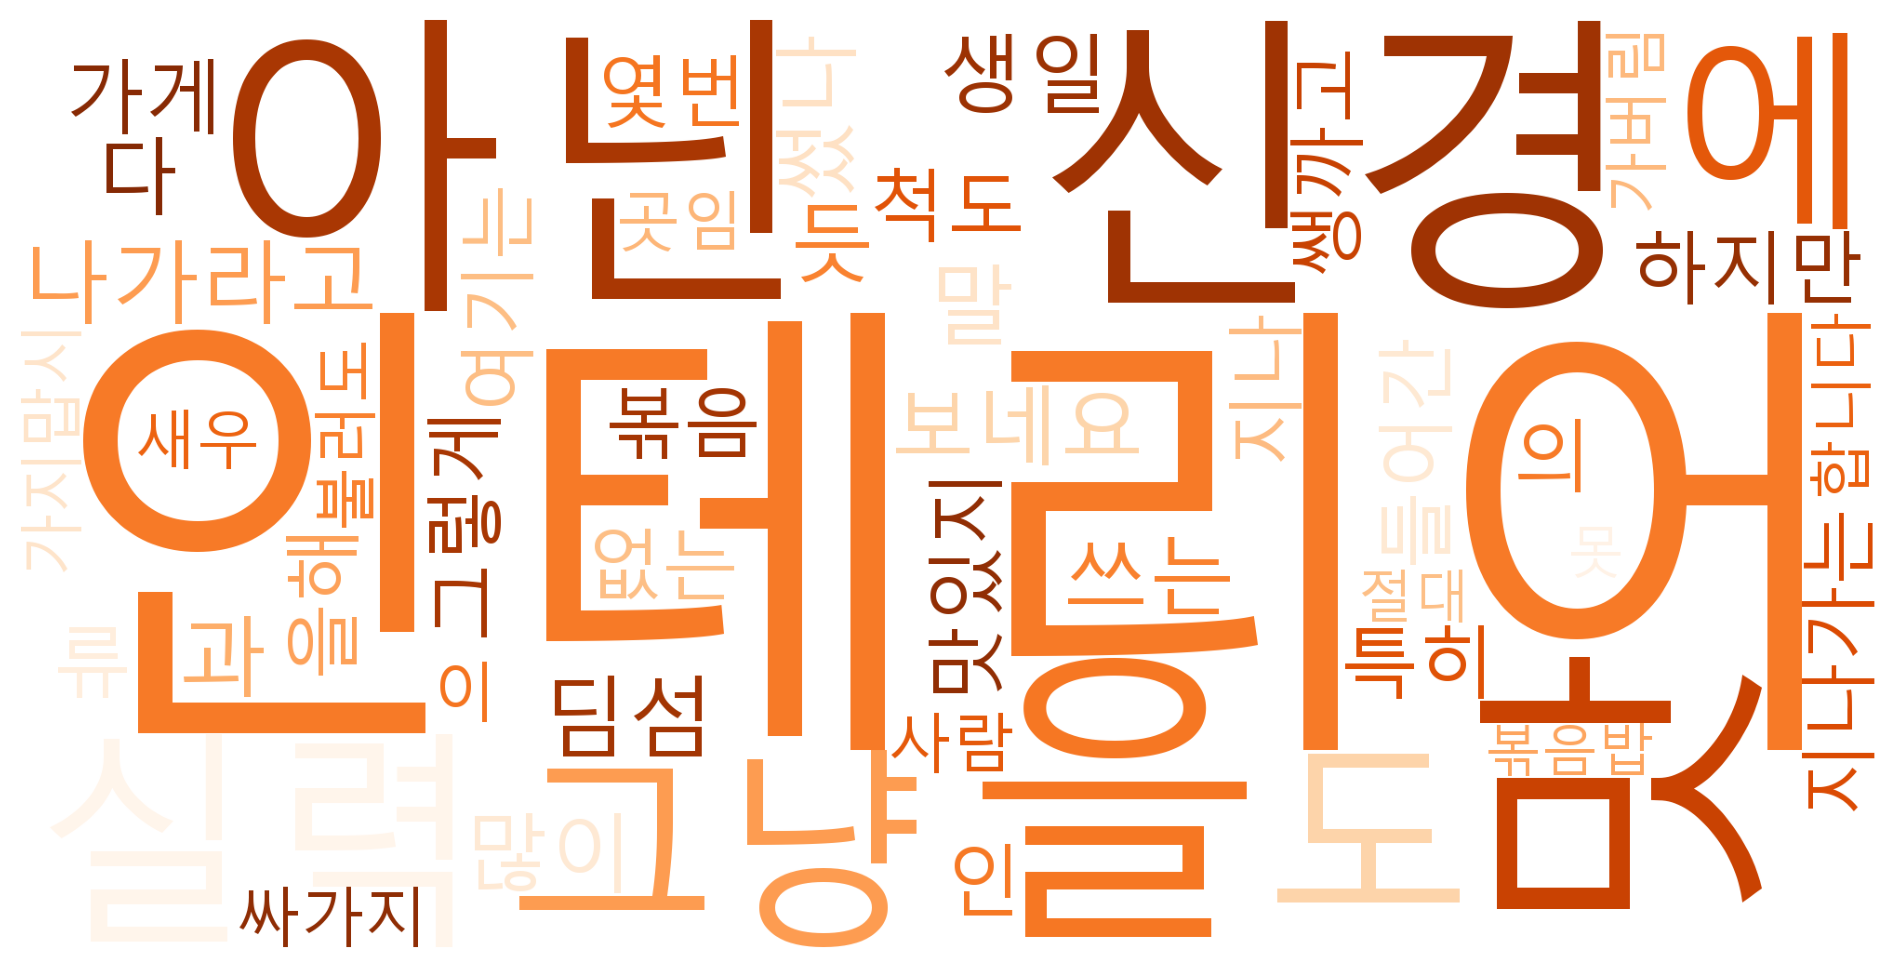

In [91]:
wordcloud = WordCloud(font_path = 'c:/Windows/fonts/malgun.ttf', 
                      relative_scaling = 0.2,
                      max_font_size = 600,
                      background_color='white',
                      colormap = 'Oranges_r', 
                      width=2000, height=1000).generate_from_frequencies(neg_wc) 

plt.figure(figsize = (12,8))                
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

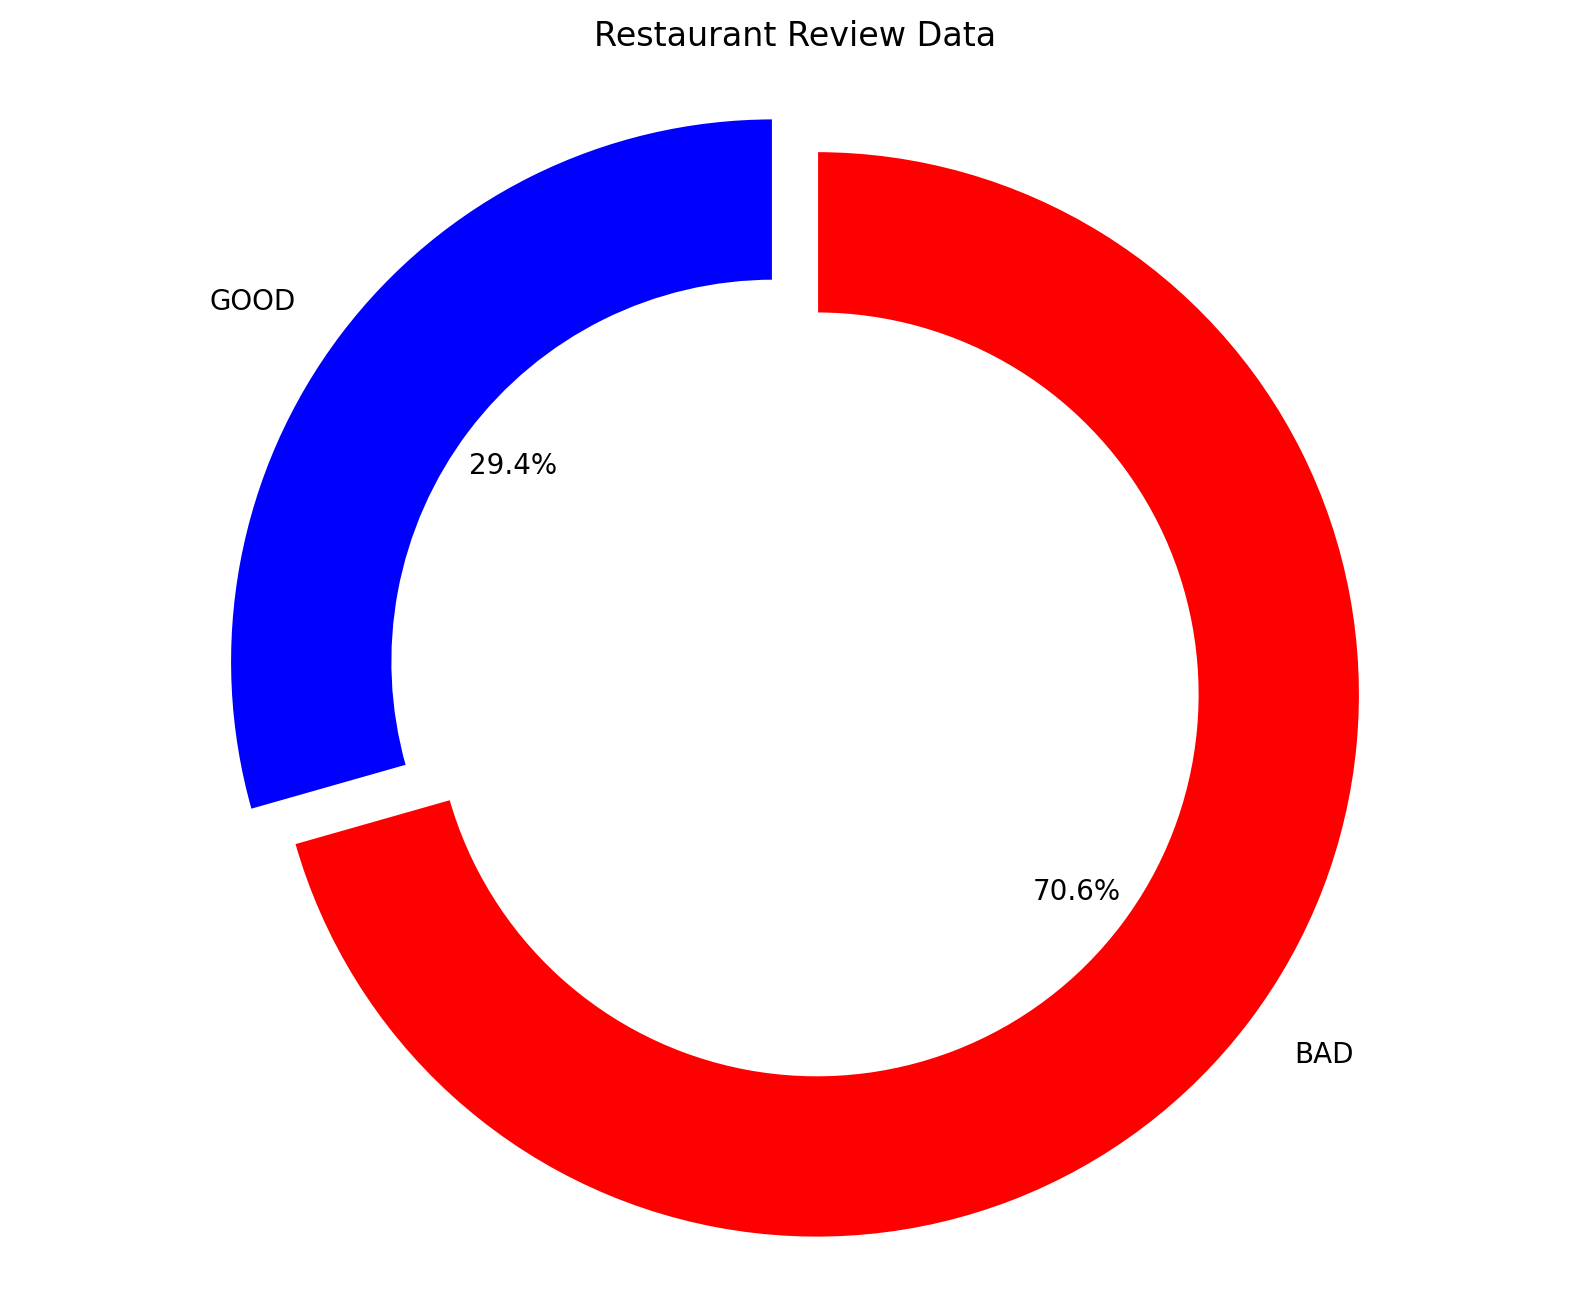

In [92]:
import matplotlib.pyplot as plt

# 데이터 준비
good_count = df['y'].value_counts()[1]
bad_count = df['y'].value_counts()[0]

sizes = [good_count, bad_count]  # 1(맛집)과 0(맛집 아님)의 개수
labels = ['GOOD', 'BAD']
colors = ['blue', 'red']  # 색상 지정
explode = (0.1, 0)  # 첫 번째 조각을 조금 돌출시키기

# 도넛 차트 그리기
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode,
       wedgeprops=dict(width=0.3, edgecolor='w'))  # 중앙 구멍의 크기 조정

# 동그란 모양 유지
ax.axis('equal')

# 제목 추가
plt.title('Restaurant Review Data')

# 표시
plt.show()

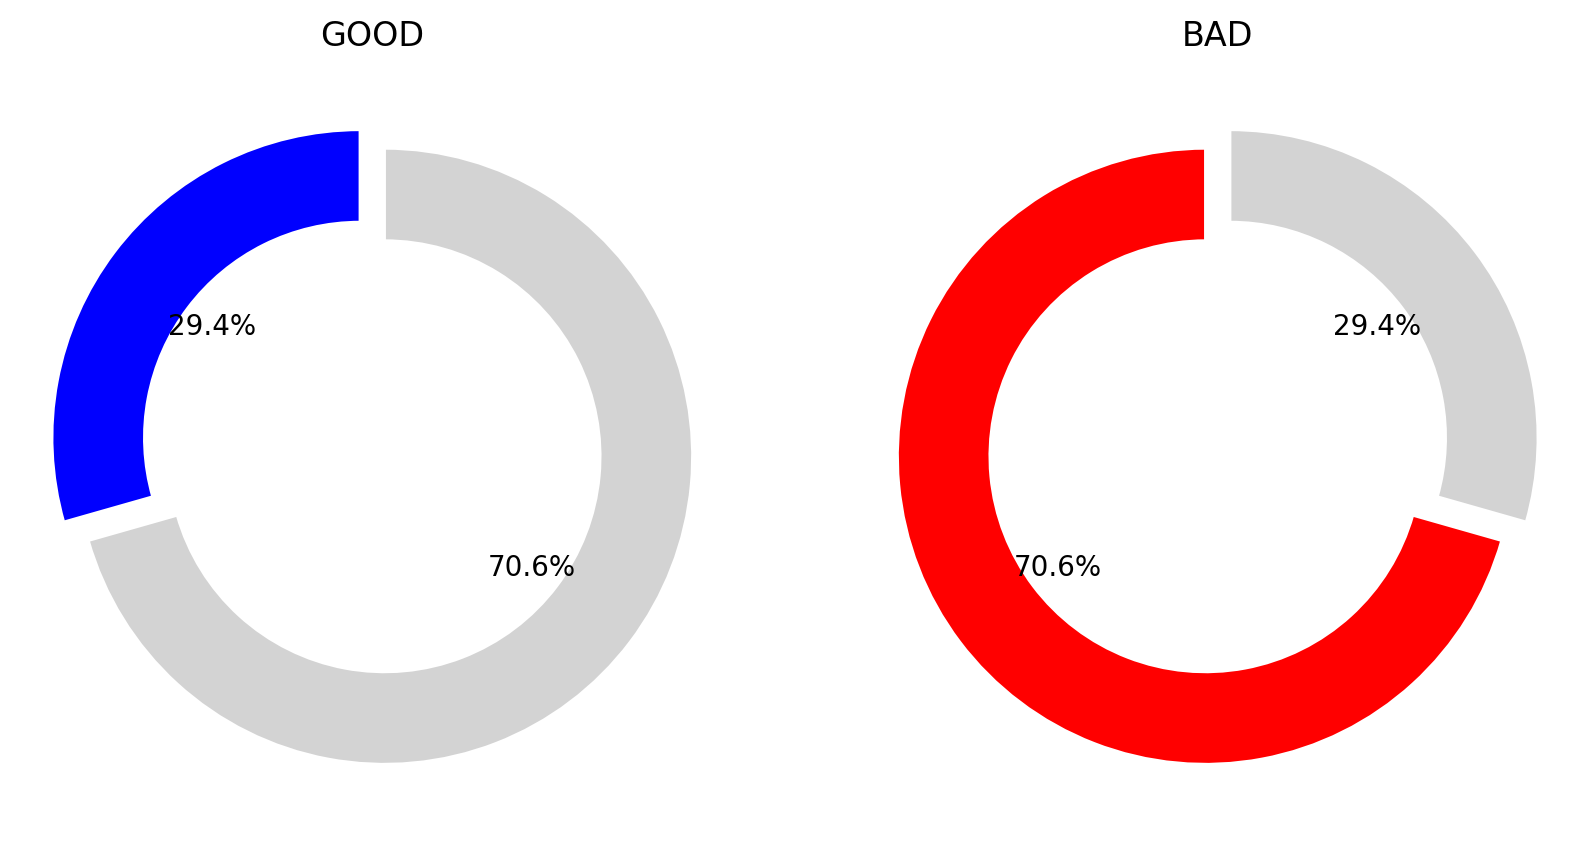

In [93]:
# 데이터 준비
good_count = df['y'].value_counts()[1]
bad_count = df['y'].value_counts()[0]

sizes_positive = [good_count, bad_count]  # 맛집(긍정)과 맛집 아님(부정)의 개수
sizes_negative = [bad_count, good_count]  # 맛집 아님(부정)과 맛집(긍정)의 개수

labels = ['GOOD', 'BAD']
colors_positive = ['blue', 'lightgray']  # 긍정 평가 색상 지정
colors_negative = ['red', 'lightgray']  # 부정 평가 색상 지정
explode = (0.1, 0)  # 첫 번째 조각을 조금 돌출시키기

# 도넛 차트 그리기
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1행 2열의 서브플롯 준비

# 긍정 평가 차트
axs[0].pie(sizes_positive, autopct='%1.1f%%', startangle=90, colors=colors_positive, explode=explode,
       wedgeprops=dict(width=0.3, edgecolor='w'))
axs[0].set_title('GOOD')

# 부정 평가 차트
axs[1].pie(sizes_negative, autopct='%1.1f%%', startangle=90, colors=colors_negative, explode=explode,
       wedgeprops=dict(width=0.3, edgecolor='w'))
axs[1].set_title('BAD')

# 동그란 모양 유지
for ax in axs:
    ax.axis('equal')

plt.show()
